In [180]:
# Consider the Bangalore House Price Data. Perform following operations.
# a) Find and replace null values in the data using appropriate technique.
# b) Transform the ‘Size’ column to numerical values. For Example: 2 BHK to be converted as 2
# c) Transform the ‘total_sqft’ column to contain numerical values on same scale. If the range is given average value of
# the range to be taken.
# d) Calculate and add one more column as ‘Price_Per_Sqft’
# e) Remove the outliers from Price_Per_Sqft and BHK Size column if any.
# f) Apply the Linear Regression model to the data and display the training and testing performance measures as Mean
# Squared Error and Accuracy

In [51]:
import pandas as pd
import seaborn as sns

In [52]:
df = pd.read_csv("C:/Users/Lenovo/Downloads/Banglore Housing Prices.csv")

In [53]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [54]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [55]:
df['size'] = df['size'].str.replace('\D', '', regex = True)

In [56]:
from sklearn.impute import SimpleImputer
import numpy as np

In [57]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)

In [58]:
df[['size', 'bath']] = imputer.fit_transform(df[['size', 'bath']])

In [59]:
df.isnull().sum()

location      1
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [60]:
df.dropna(inplace=True)

In [61]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [62]:
sqft = []
sqft_split = []
for i in df['total_sqft']:
    if '-' in i:
        sqft_split = i.split()
        avg = (float(sqft_split[0]) + float(sqft_split[0]))/2
        sqft.append(avg)
        
    else:
        sqft.append(i)

In [63]:
df['total_sqft'] = sqft

In [64]:
df['total_sqft'] = df['total_sqft'].str.replace("\D", '', regex = True)
df['total_sqft'] = df['total_sqft'].apply(pd.to_numeric)

In [65]:
price_per_sqft = []
for i,j in zip(df['total_sqft'], df['price']):
    price_per_sqft.append(i/j)

In [66]:
df['price_per_sqft'] = price_per_sqft

In [67]:
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,27.028411
1,Chikka Tirupathi,4,2600.0,5.0,120.00,21.666667
2,Uttarahalli,3,1440.0,2.0,62.00,23.225806
3,Lingadheeranahalli,3,1521.0,3.0,95.00,16.010526
4,Kothanur,2,1200.0,2.0,51.00,23.529412


In [68]:
df['size'] = df['size'].apply(pd.to_numeric)

In [69]:
import seaborn as sns

<AxesSubplot:>

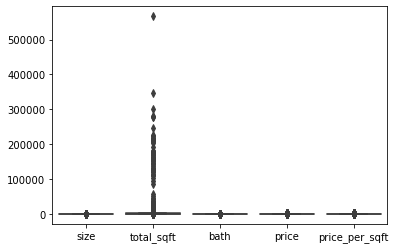

In [70]:
sns.boxplot(data=df)

In [71]:
# q1 = df['total_sqft'].quantile(0.25)
# q3 = df['total_sqft'].quantile(0.75)
# IQR = q3-q1
# l_bound = q1 - (IQR*1.5)
# u_bound = q3 - (IQR*1.5)

In [72]:
df.describe()

,size,total_sqft,bath,price,price_per_sqft
count,13319.000000,13118.000000,13319.000000,13319.000000,13118.000000
mean,2.802763,2405.041775,2.688790,112.567621,26.445655
std,1.294543,13056.560021,1.338801,148.977089,113.381328
min,1.000000,1.000000,1.000000,8.000000,0.008333
25%,2.000000,1100.000000,2.000000,50.000000,13.666667
50%,3.000000,1275.500000,2.000000,72.000000,18.437500
75%,3.000000,1680.750000,3.000000,120.000000,23.588840
max,43.000000,566584.000000,40.000000,3600.000000,2877.404762


In [73]:
df=df[df['total_sqft'] >= 1100]
df=df[df['total_sqft'] <= 1680.75]

In [74]:
df=df[df['size'] >= 2]
df=df[df['size'] <= 3]

In [75]:
df=df[df['price_per_sqft'] >= 13.666]
df=df[df['price_per_sqft'] <= 23.588]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size'>

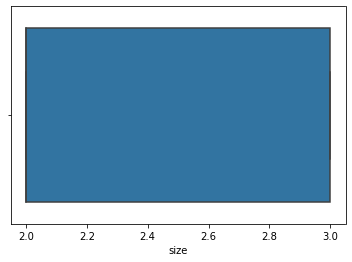

In [76]:
sns.boxplot(df['size'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft'>

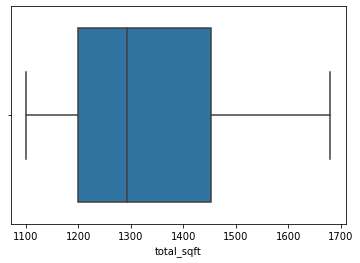

In [77]:
sns.boxplot(df['total_sqft'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

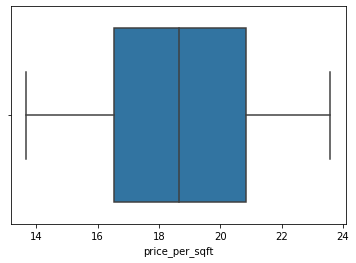

In [78]:
sns.boxplot(df['price_per_sqft'])

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [80]:
df

,location,size,total_sqft,bath,price,price_per_sqft
2,Uttarahalli,3,1440.0,2.0,62.00,23.225806
3,Lingadheeranahalli,3,1521.0,3.0,95.00,16.010526
4,Kothanur,2,1200.0,2.0,51.00,23.529412
8,Marathahalli,3,1310.0,3.0,63.25,20.711462
15,Mysore Road,2,1175.0,2.0,73.50,15.986395
...,...,...,...,...,...,...
13289,Hebbal,2,1349.0,2.0,96.80,13.935950
13292,Udayapur Village,3,1440.0,2.0,63.93,22.524636
13301,Kothanur,3,1454.0,3.0,71.50,20.335664
13309,Yeshwanthpur,3,1675.0,3.0,92.13,18.180831


In [81]:
encoder = LabelEncoder()
df['location'] = encoder.fit_transform(df['location'])

In [82]:
df_x = df.iloc[:,[0, 4]]
df_y = df.iloc[:,[5]]

In [83]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state=4, test_size=0.25)

In [84]:
scaler = StandardScaler()

In [85]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [86]:
model = LinearRegression()

In [87]:
model.fit(x_train, y_train)

LinearRegression()

In [88]:
y_pred = model.predict(x_test)

In [89]:
print(y_pred)

[[18.28416458]
 [20.74703318]
 [17.69210581]
 [18.29860028]
 [20.13270375]
 [21.92873687]
 [21.10620545]
 [18.36920395]
 [19.76224539]
 [18.64738557]
 [15.45792423]
 [17.96016292]
 [21.89826423]
 [18.71184079]
 [14.28149633]
 [19.80424014]
 [21.91269993]
 [19.33873603]
 [17.66848376]
 [20.81505124]
 [18.3408575 ]
 [18.98409737]
 [15.4933573 ]
 [17.54527864]
 [20.41099707]
 [20.39761125]
 [18.24423052]
 [17.67528913]
 [16.60926699]
 [19.95996128]
 [21.06994593]
 [14.99975907]
 [21.15134981]
 [18.28442705]
 [17.12365673]
 [19.85032266]
 [19.05639522]
 [17.34714582]
 [17.69289321]
 [21.85207   ]
 [20.22929168]
 [20.60709912]
 [17.80321   ]
 [15.46317358]
 [18.11640899]
 [20.38317555]
 [15.44506334]
 [21.25832472]
 [19.50456513]
 [21.23957784]
 [16.66007392]
 [20.77354237]
 [18.30831156]
 [17.63567536]
 [16.9659263 ]
 [21.97418769]
 [19.09932047]
 [16.25418249]
 [18.826578  ]
 [14.88321474]
 [20.67612799]
 [21.81318581]
 [17.58685646]
 [19.37708886]
 [20.47713881]
 [19.75084759]
 [19.04131

In [90]:
acc = model.score(x_test, y_test)
acc = acc*100
acc

61.37688144456668

In [91]:
from sklearn.metrics import mean_squared_error

In [92]:
m1 = mean_squared_error(y_test, y_pred, squared=False)

In [93]:
m1

1.6622875423728942